# Methodologies for image processing of radar remote sensing data #

## Lecture 6. Classification ###


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from scipy.signal import convolve2d
from skimage.io import imread, imsave
import os
import time


## Part-1: generating the histogram of DEM

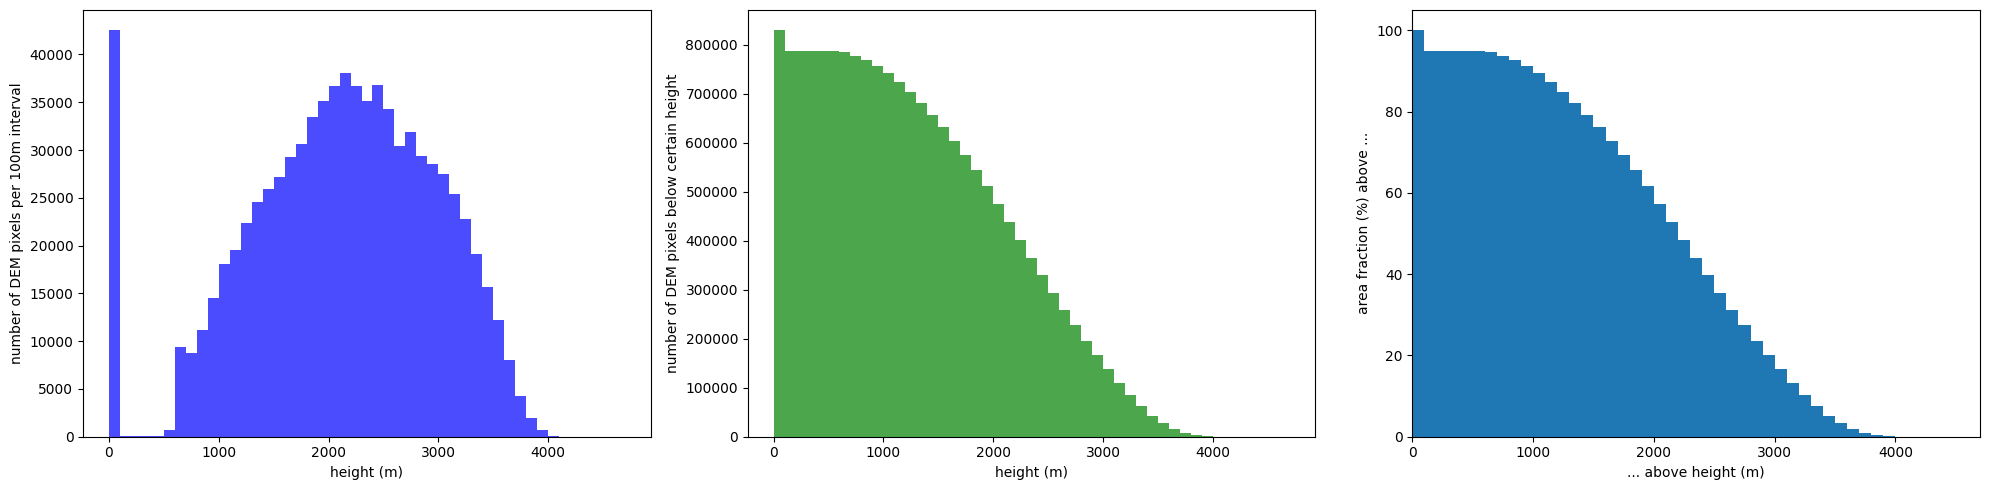

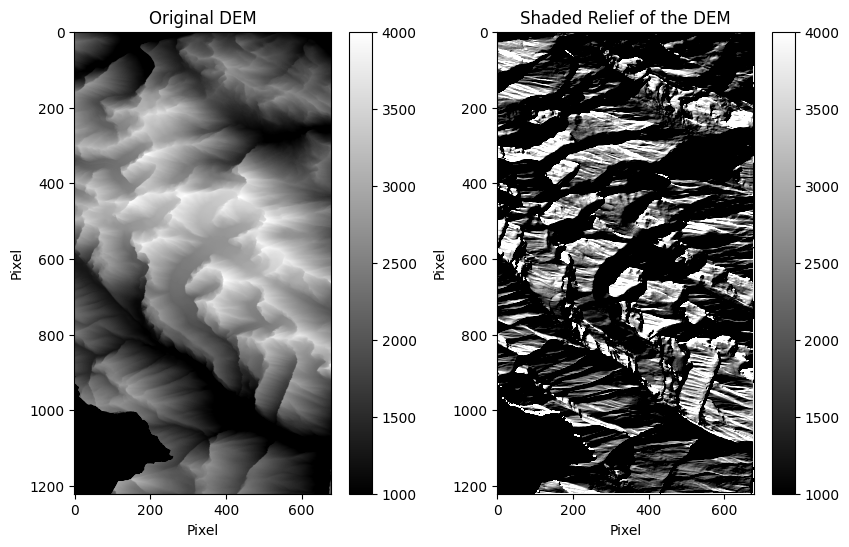

In [2]:
# Define the data directory and filename
dataDir = './exercise_data/'
filename = dataDir + 'Aletsch_SwissAlti3D_digital_elevation_model_median.tiff'

# Load DEM image
dem = imread(filename)

# Create height values
heights = dem.astype(float)

# Define bins for the histogram
bins = np.linspace(0, 4700, 48)

# Create a histogram of heights
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].hist(heights.ravel(), bins, color='blue', alpha=0.7)
axs[0].set_xlabel('height (m)')
axs[0].set_ylabel('number of DEM pixels per 100m interval')

axs[1].hist(heights.ravel(), bins, cumulative=-1, color='green', alpha=0.7)
axs[1].set_xlabel('height (m)')
axs[1].set_ylabel('number of DEM pixels below certain height')

# Calculate area fraction
hh, _ = np.histogram(heights, bins)
hc2 = np.cumsum(hh[::-1])[::-1]
hc2 = 100.0 * hc2 / hc2.max()
axs[2].bar(bins[:-1], hc2, width=np.diff(bins), align="edge")
axs[2].set_xlim([0, 4700])
axs[2].set_xlabel('... above height (m)')
axs[2].set_ylabel('area fraction (%) above ...')
plt.tight_layout()

# Generate shaded relief DEM
shading_kernel = np.array([
    [-50, -25, 0],
    [-25, 0, 25],
    [0, 25, 50]
])

dem_shaded = convolve2d(heights, shading_kernel, mode='same', boundary='wrap')

height_range = [1000, 4000]

# Display original DEM and shaded relief
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

im1 = axs[0].imshow(heights, cmap='gray', vmin=height_range[0], vmax=height_range[1])
axs[0].set_title('Original DEM')
axs[0].set_xlabel('Pixel')
axs[0].set_ylabel('Pixel')

im2 = axs[1].imshow(dem_shaded, cmap='gray', vmin=height_range[0], vmax=height_range[1])
axs[1].set_title('Shaded Relief of the DEM')
axs[1].set_xlabel('Pixel')
axs[1].set_ylabel('Pixel')

# Add colorbars with mappable specified
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
plt.show()

## Part 2: load time stack images and visulization

Number of elements found: 94
reading: s0amp_2011-04-22HHVVcal.tiff 1/94
reading: s0amp_2011-05-03HHVVcal.tiff 2/94
reading: s0amp_2011-06-05HHVVcal.tiff 3/94


reading: s0amp_2011-06-16HHVVcal.tiff 4/94
reading: s0amp_2011-06-27HHVVcal.tiff 5/94
reading: s0amp_2011-07-08HHVVcal.tiff 6/94
reading: s0amp_2011-07-19HHVVcal.tiff 7/94
reading: s0amp_2011-07-30HHVVcal.tiff 8/94
reading: s0amp_2011-08-10HHVVcal.tiff 9/94
reading: s0amp_2011-08-21HHVVcal.tiff 10/94
reading: s0amp_2011-09-23HHVVcal.tiff 11/94
reading: s0amp_2011-11-06HHVVcal.tiff 12/94
reading: s0amp_2011-11-17HHVVcal.tiff 13/94
reading: s0amp_2011-11-28HHVVcal.tiff 14/94
reading: s0amp_2011-12-09HHVVcal.tiff 15/94
reading: s0amp_2011-12-20HHVVcal.tiff 16/94
reading: s0amp_2012-01-11HHVVcal.tiff 17/94
reading: s0amp_2012-01-22HHVVcal.tiff 18/94
reading: s0amp_2012-02-02HHVVcal.tiff 19/94
reading: s0amp_2012-02-13HHVVcal.tiff 20/94
reading: s0amp_2012-02-24HHVVcal.tiff 21/94
reading: s0amp_2012-03-06HHVVcal.tiff 22/94
reading: s0amp_2012-03-17HHVVcal.tiff 23/94
reading: s0amp_2012-03-28HHVVcal.tiff 24/94
reading: s0amp_2012-04-08HHVVcal.tiff 25/94
reading: s0amp_2012-04-30HHVVcal.tiff 

/tmp/ipykernel_2304083/2992805960.py:28: RuntimeWarning: Mean of empty slice
  bscat_mean = np.nanmean(bscat, axis=2)
/tmp/ipykernel_2304083/2992805960.py:29: RuntimeWarning: All-NaN slice encountered
  bscat_max = np.nanmax(bscat, axis=2)
/tmp/ipykernel_2304083/2992805960.py:30: RuntimeWarning: All-NaN slice encountered
  bscat_min = np.nanmin(bscat, axis=2)
/home/lahuang/working/MIPRS_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


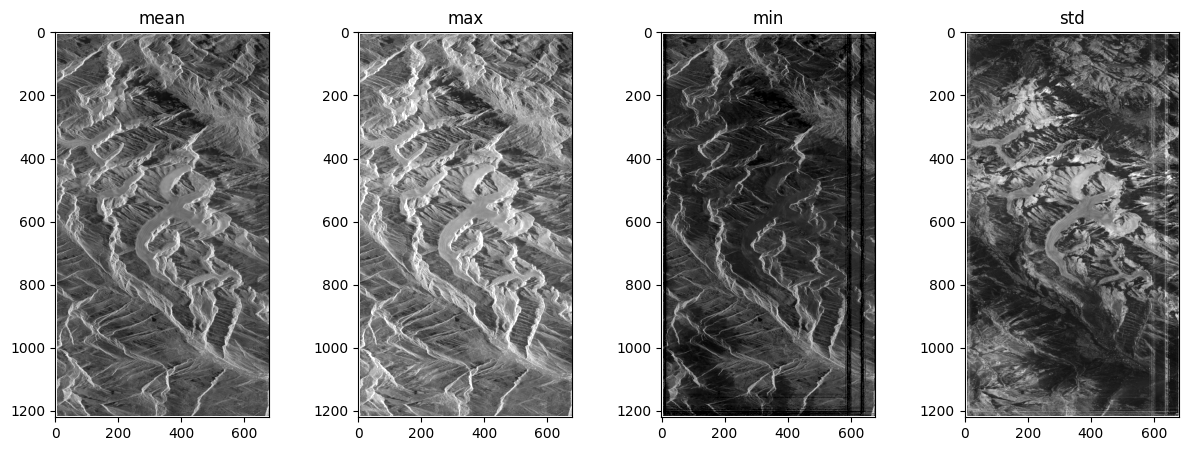

In [3]:
# Check if the path exists and if the folder is empty
dataDir = './exercise_data/radar-images'
# List files in the directory
file_list = os.listdir(dataDir)
file_list = sorted(file_list) # Sort the file list by filename
files_bscat = [f for f in file_list if f.startswith('s0amp') and f.endswith('.tiff')]
numfiles = len(files_bscat)

if numfiles == 0:
    print('The folder is empty')
else:
    print('Number of elements found:', numfiles)

    # Read the first image to determine dimensions
    backscatter = imread(os.path.join(dataDir, files_bscat[0]))
    dim1, dim2 = backscatter.shape

    # Initialize an array to store all backscatter images
    bscat = np.zeros((dim1, dim2, numfiles))

    for i, filename in enumerate(files_bscat):
        print(f'reading: {filename} {i + 1}/{numfiles}')
        backscatter = imread(os.path.join(dataDir, filename)).astype(float)
        backscatter[backscatter == 0] = np.nan
        bscat[:, :, i] = backscatter

    # Create reference images
    bscat_mean = np.nanmean(bscat, axis=2)
    bscat_max = np.nanmax(bscat, axis=2)
    bscat_min = np.nanmin(bscat, axis=2)
    bscat_std = np.nanstd(bscat, axis=2)

    # Visualize reference images
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))

    int_range = [30, 180]

    axs[0].imshow(bscat_mean, cmap='gray', vmin=int_range[0], vmax=int_range[1])
    axs[0].set_title('mean')

    axs[1].imshow(bscat_max, cmap='gray', vmin=int_range[0], vmax=int_range[1])
    axs[1].set_title('max')

    axs[2].imshow(bscat_min, cmap='gray', vmin=int_range[0], vmax=int_range[1])
    axs[2].set_title('min')

    axs[3].imshow(bscat_std, cmap='gray', vmin=0, vmax=30)
    axs[3].set_title('std')

    plt.show()

    # # Section 2
    # bscat_xyt = bscat
    # bscat_txy = np.transpose(bscat_xyt, (2, 0, 1))
    # bscat_xty = np.transpose(bscat_xyt, (0, 2, 1))

    # print('Averaging along different dimensions:')
    # tic = time.time()
    # bscat_mean = np.nanmean(bscat_txy, axis=0)
    # bscat_max = np.nanmax(bscat_txy, axis=0)
    # bscat_min = np.nanmin(bscat_txy, axis=0)
    # bscat_std = np.nanstd(bscat_txy, axis=0)
    # print('time-average along FIRST dimension')
    # toc = time.time()
    # print('Time elapsed:', toc - tic, 'seconds')

    # tic = time.time()
    # bscat_mean = np.nanmean(bscat_xty, axis=1)
    # bscat_max = np.nanmax(bscat_xty, axis=1)
    # bscat_min = np.nanmin(bscat_xty, axis=1)
    # bscat_std = np.nanstd(bscat_xty, axis=1)
    # print('time-average along SECOND dimension')
    # toc = time.time()
    # print('Time elapsed:', toc - tic, 'seconds')

    # tic = time.time()
    # bscat_mean = np.nanmean(bscat_xyt, axis=2)
    # bscat_max = np.nanmax(bscat_xyt, axis=2)
    # bscat_min = np.nanmin(bscat_xyt, axis=2)
    # bscat_std = np.nanstd(bscat_xyt, axis=2)
    # print('time-average along THIRD dimension')
    # toc = time.time()
    # print('Time elapsed:', toc - tic, 'seconds')

## Part 3: we use a simply threshold (-8dB) to achieve wet snow mapping. The pixels < -8dB are classified as wet snow

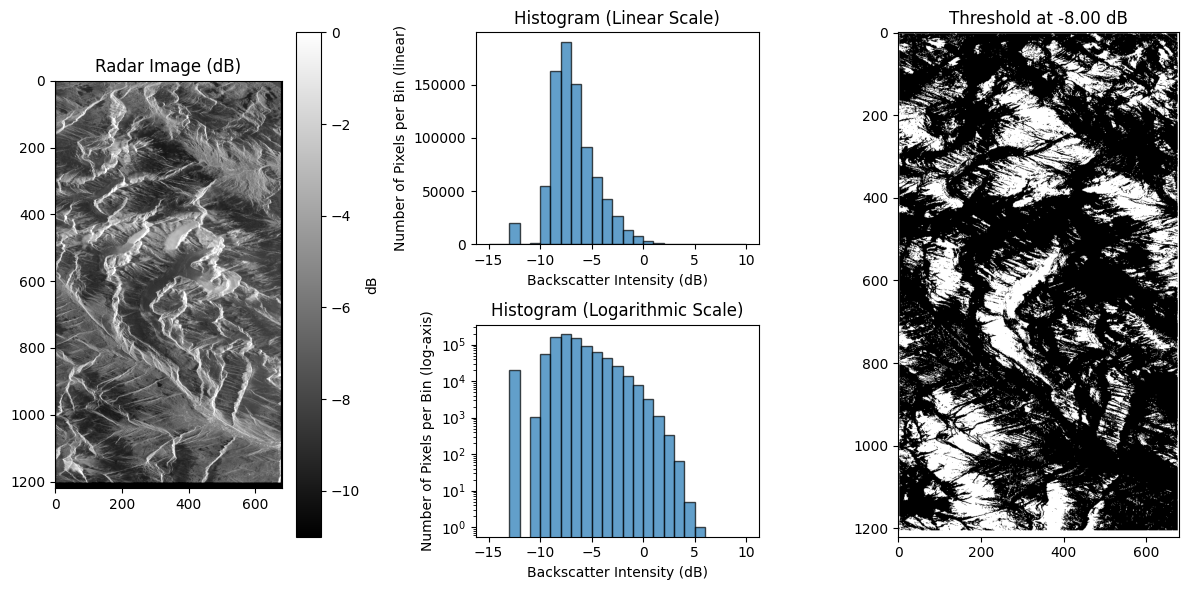

In [4]:
# Load the radar image (choose either wet snow or dry snow)
dataDir = './exercise_data/radar-images/'
radar_image_DN = imread(dataDir + 's0amp_2014-05-07HHVVcal.tiff')  # Wet snow in spring
# radar_image_DN = imread(dataDir + 's0amp_2012-11-25HHVVcal.tiff')  # Dry snow in November

# Convert digital numbers (DN) to dB: 
# The digital numbers (DN) in the radar image need to be calibrated. The range of digital numbers ranges from 0...255 and corresponds to abackscatter signal between -13 and +7 dB. Below, the data is converted. 
radar_image_dB = (radar_image_DN / 255.0) * 20 - 13

# Create a figure and subplots
fig = plt.figure(figsize=(12, 6))

# Subplot 1: Display radar image in dB
ax1 = plt.subplot(1, 3, 1)
im1 = ax1.imshow(radar_image_dB, cmap='gray', vmin=-11, vmax=0)
ax1.set_title('Radar Image (dB)')
fig.colorbar(im1, ax=ax1, label='dB')

# Subplot 2: Histogram of backscatter intensity (linear scale)
ax2 = plt.subplot(2, 3, 2)
bins = np.linspace(-15, 10, 26)
ax2.hist(radar_image_dB.flatten(), bins, edgecolor='black', alpha=0.7)
ax2.set_xlabel('Backscatter Intensity (dB)')
ax2.set_ylabel('Number of Pixels per Bin (linear)')
ax2.set_title('Histogram (Linear Scale)')

# Subplot 3: Histogram of backscatter intensity (logarithmic scale)
ax3 = plt.subplot(2, 3, 5)
ax3.hist(radar_image_dB.flatten(), bins, edgecolor='black', alpha=0.7, log=True)
ax3.set_xlabel('Backscatter Intensity (dB)')
ax3.set_ylabel('Number of Pixels per Bin (log-axis)')
ax3.set_title('Histogram (Logarithmic Scale)')

# Thresholding
threshold_dB = -8

# Subplot 4: Thresholded radar image
ax4 = plt.subplot(1, 3, 3)
thresholded_image = radar_image_dB < threshold_dB
im4 = ax4.imshow(thresholded_image, cmap='gray', vmin=0, vmax=1)
ax4.set_title(f'Threshold at {threshold_dB:.2f} dB')
plt.tight_layout()
plt.show()

## Part 4: calculate the averaged SAR backscattering image and backscattering ratio

Number of elements found: 94
reading: s0amp_2011-04-22HHVVcal.tiff 1/94
reading: s0amp_2011-05-03HHVVcal.tiff 2/94
reading: s0amp_2011-06-05HHVVcal.tiff 3/94
reading: s0amp_2011-06-16HHVVcal.tiff 4/94
reading: s0amp_2011-06-27HHVVcal.tiff 5/94
reading: s0amp_2011-07-08HHVVcal.tiff 6/94
reading: s0amp_2011-07-19HHVVcal.tiff 7/94
reading: s0amp_2011-07-30HHVVcal.tiff 8/94
reading: s0amp_2011-08-10HHVVcal.tiff 9/94
reading: s0amp_2011-08-21HHVVcal.tiff 10/94
reading: s0amp_2011-09-23HHVVcal.tiff 11/94
reading: s0amp_2011-11-06HHVVcal.tiff 12/94
reading: s0amp_2011-11-17HHVVcal.tiff 13/94
reading: s0amp_2011-11-28HHVVcal.tiff 14/94
reading: s0amp_2011-12-09HHVVcal.tiff 15/94
reading: s0amp_2011-12-20HHVVcal.tiff 16/94
reading: s0amp_2012-01-11HHVVcal.tiff 17/94
reading: s0amp_2012-01-22HHVVcal.tiff 18/94
reading: s0amp_2012-02-02HHVVcal.tiff 19/94
reading: s0amp_2012-02-13HHVVcal.tiff 20/94
reading: s0amp_2012-02-24HHVVcal.tiff 21/94
reading: s0amp_2012-03-06HHVVcal.tiff 22/94
reading: s0a

/tmp/ipykernel_2304083/1441864498.py:31: RuntimeWarning: invalid value encountered in divide
  bscat_mean = bscat_sum / bscat_mask
/tmp/ipykernel_2304083/1441864498.py:34: RuntimeWarning: invalid value encountered in cast
  bscat_8bit = bscat_mean .astype(np.uint8)


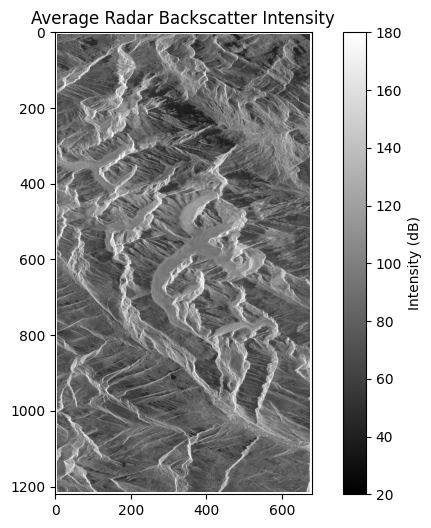

In [5]:
# calculate the averaged SAR backscattering image
# List files in the directory
file_list = os.listdir(dataDir)
file_list = sorted(file_list) # Sort the file list by filename
files_bscat = [f for f in file_list if f.startswith('s0amp') and f.endswith('.tiff')]
numfiles = len(files_bscat)

if numfiles == 0:
    print('The folder is empty')
else:
    print('Number of elements found:', numfiles)

    # Read the first image to determine dimensions
    backscatter = imread(os.path.join(dataDir, files_bscat[0]))
    dim1, dim2 = backscatter.shape

    # Initialize arrays to store the sum and mask
    bscat_sum = np.zeros((dim1, dim2))
    bscat_mask = np.zeros((dim1, dim2))

    for i, filename in enumerate(files_bscat):
        print(f'reading: {filename} {i + 1}/{numfiles}')
        backscatter = imread(os.path.join(dataDir, filename)).astype(float)

        # In the backscatter data, all pixels of value 0 are invalid and need
        # to be masked out by assigning them no weight.
        bscat_sum += backscatter
        bscat_mask += (backscatter != 0)

    # Create the reference image by averaging
    bscat_mean = bscat_sum / bscat_mask

    # Write the reference image to disk
    bscat_8bit = bscat_mean .astype(np.uint8)
    imsave(os.path.join(dataDir, 'average_radar_backscatter_intensity.tiff'), bscat_8bit)

    # Visualize the reference image
    plt.figure(figsize=(8, 6))
    plt.imshow(bscat_mean, cmap='gray', vmin=20, vmax=180)
    plt.title('Average Radar Backscatter Intensity')
    plt.colorbar(label='Intensity (dB)')
    plt.show()

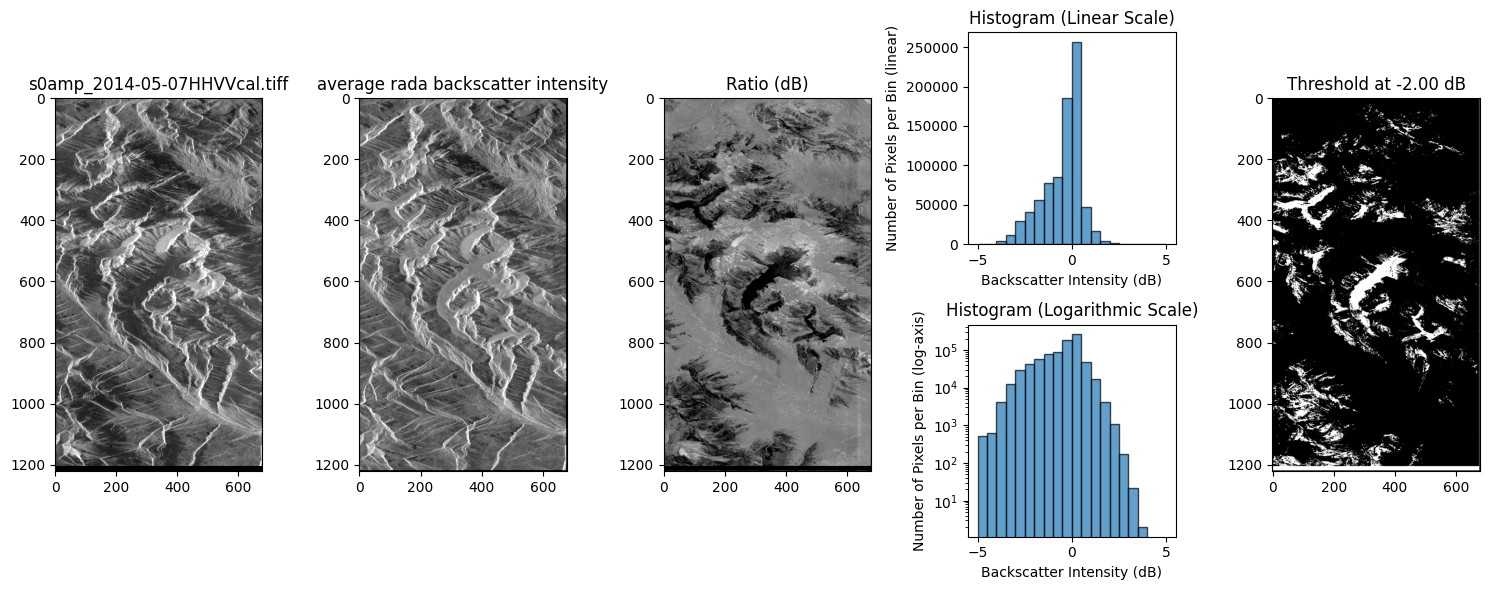

In [6]:
# Set the path to the data directory
dataDir = './exercise_data/radar-images/'
filename = 's0amp_2014-05-07HHVVcal.tiff' # Dry snow in May
#filename ='s0amp_2012-11-25HHVVcal.tiff'  # Dry snow in November

# Load the radar image and reference image
radar_image_DN = imread(os.path.join(dataDir, filename))
radar_refimage_DN = bscat_8bit

#The digital numbers (DN) in the radar image need to be calibrated. The range of digital numbers ranges from 0...255 and corresponds to a backscatter signal between -13 and +7 dB. Below, the data is converted. 
# Convert digital numbers (DN) to dB
radar_image_dB = (radar_image_DN / 255.0) * 20 - 13
radar_refimage_dB = (radar_refimage_DN / 255.0) * 20 - 13

# Calculate the difference in dB (ratio)
ratio = radar_image_dB - radar_refimage_dB

# Create a figure with subplots
fig = plt.figure(figsize=(15, 6))
colormap = plt.cm.gray

# Subplot 1: Display radar image in dB
plt.subplot(151)
plt.imshow(radar_image_dB, cmap=colormap, vmin=-11, vmax=0)
plt.title(filename)

# Subplot 2: Display reference image in dB
plt.subplot(152)
plt.imshow(radar_refimage_dB, cmap=colormap, vmin=-11, vmax=0)
plt.title('average rada backscatter intensity')

# Subplot 3: Display the difference in dB (ratio)
plt.subplot(153)
plt.imshow(ratio, cmap=colormap, vmin=-3, vmax=3)
plt.title('Ratio (dB)')

# Subplot 4: Histogram of the difference in dB (linear scale)
plt.subplot(254)
bins = np.linspace(-5, 5, 21)
plt.hist(ratio.flatten(), bins, edgecolor='black', alpha=0.7)
plt.xlabel('Backscatter Intensity (dB)')
plt.ylabel('Number of Pixels per Bin (linear)')
plt.title('Histogram (Linear Scale)')

# Subplot 5: Histogram of the difference in dB (logarithmic scale)
plt.subplot(259)
plt.hist(ratio.flatten(), bins, edgecolor='black', alpha=0.7, log=True)
plt.xlabel('Backscatter Intensity (dB)')
plt.ylabel('Number of Pixels per Bin (log-axis)')
plt.title('Histogram (Logarithmic Scale)')

# Thresholding
threshold_dB = -2

# Subplot 6: Thresholded radar image
plt.subplot(155)
thresholded_image = ratio < threshold_dB
plt.imshow(thresholded_image, cmap=colormap, vmin=0, vmax=1)
plt.title(f'Threshold at {threshold_dB:.2f} dB')

plt.tight_layout()
plt.show()

## Part 5: Combined analysis to determine the elevation bands which are covered by wet snow. This part contains nine blocks.

In [7]:
#----Block 1: Load data----------
from datetime import datetime
# Set the path to the data directory
dataDir = './exercise_data/radar-images/'
demfile = './exercise_data/Aletsch_SwissAlti3D_digital_elevation_model_median.tiff'

# Check if the path exists and if the folder is empty
if not os.path.exists(dataDir):
    print('The path "dataDir" does not exist!')
else:
    # List files in the directory
    file_list = os.listdir(dataDir)
    file_list = sorted(file_list) # Sort the file list by filename
    files_bscat = [f for f in file_list if f.startswith('s0amp') and f.endswith('.tiff')]
    numfiles = len(files_bscat)

    if numfiles == 0:
        print('The folder is empty')
    else:
        print(f'Number of radar images found: {numfiles}')

        # Load DEM
        dem = imread(demfile).astype(float)

        # Load radar backscatter data
        dim1, dim2 = dem.shape
        bscat = np.zeros((dim1, dim2, numfiles))

        for i, filename in enumerate(files_bscat):
            print(f'reading: {filename} {i + 1}/{numfiles}')
            backscatter = imread(os.path.join(dataDir, filename)).astype(float)
            backscatter[backscatter == 0] = np.nan
            bscat[:, :, i] = backscatter

        # Calibrate the radar data
        bscat = bscat / 255.0 * 20 - 13

        # Convert DEM to double and set 0 values to NaN
        dem = dem.astype(float)
        dem[dem < 400] = np.nan

        # Get dates from satellite name
        dates = [datetime.strptime(f[6:16], '%Y-%m-%d') for f in files_bscat]

Number of radar images found: 94
reading: s0amp_2011-04-22HHVVcal.tiff 1/94


reading: s0amp_2011-05-03HHVVcal.tiff 2/94
reading: s0amp_2011-06-05HHVVcal.tiff 3/94
reading: s0amp_2011-06-16HHVVcal.tiff 4/94
reading: s0amp_2011-06-27HHVVcal.tiff 5/94
reading: s0amp_2011-07-08HHVVcal.tiff 6/94
reading: s0amp_2011-07-19HHVVcal.tiff 7/94
reading: s0amp_2011-07-30HHVVcal.tiff 8/94
reading: s0amp_2011-08-10HHVVcal.tiff 9/94
reading: s0amp_2011-08-21HHVVcal.tiff 10/94
reading: s0amp_2011-09-23HHVVcal.tiff 11/94
reading: s0amp_2011-11-06HHVVcal.tiff 12/94
reading: s0amp_2011-11-17HHVVcal.tiff 13/94
reading: s0amp_2011-11-28HHVVcal.tiff 14/94
reading: s0amp_2011-12-09HHVVcal.tiff 15/94
reading: s0amp_2011-12-20HHVVcal.tiff 16/94
reading: s0amp_2012-01-11HHVVcal.tiff 17/94
reading: s0amp_2012-01-22HHVVcal.tiff 18/94
reading: s0amp_2012-02-02HHVVcal.tiff 19/94
reading: s0amp_2012-02-13HHVVcal.tiff 20/94
reading: s0amp_2012-02-24HHVVcal.tiff 21/94
reading: s0amp_2012-03-06HHVVcal.tiff 22/94
reading: s0amp_2012-03-17HHVVcal.tiff 23/94
reading: s0amp_2012-03-28HHVVcal.tiff 24

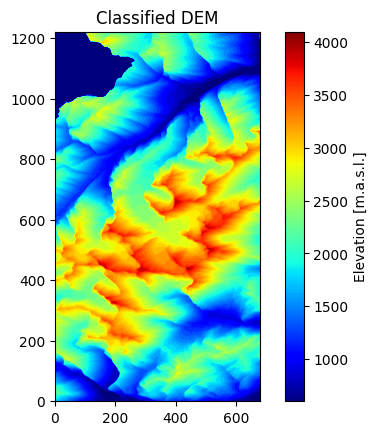

In [8]:
#----Block 2: Classify DEM height---------
# Define elevation classes
elev_min = 600
elev_max = 4000
elev_bin = 100  # height difference between classes

elevations = np.arange(elev_min, elev_max + elev_bin, elev_bin)
n_elev = len(elevations)

ele_class_indices = [[] for _ in range(n_elev)]  # List to store arrays of indices
elevation = np.zeros((dim1, dim2), dtype=float)  # DEM with classified elevation bands (only used for displaying)

ele_class_II = []
for i in range(n_elev):
    # Calculate logical indices for pixels in the elevation class
    II = (elevations[i] <= dem) & (dem < (elevations[i] + elev_bin))
    elevation_class_indices = np.where(II)
    ele_class_II.append(elevation_class_indices)
    elevation[II] = elevations[i]  # Set class height values in the elevation matrix (only used for displaying)

elevation[np.isnan(elevation)] = np.nan  # Set values with "no elevation" to NaN

# Plot the modified Digital Elevation Model
import matplotlib.pyplot as plt

plt.figure()
plt.title('Classified DEM')
plt.imshow(elevation, cmap='jet', vmin=600, vmax=4100)
c = plt.colorbar()
c.set_label('Elevation [m.a.s.l.]')
plt.ylim(0, dim1)
plt.xlim(0, dim2)
plt.show()

In [9]:
#---Block 3: Calculate backscatter ratios (differences in dB)-----------------------
bscat_mean = np.nanmean(bscat, axis=2)

# Subtract the mean backscatter value from the acquisitions
bscat_new = np.zeros(bscat.shape)  # Preallocate the new matrix (decrease calculation time)
for i in range(numfiles):
    bscat_new[:, :, i] = bscat[:, :, i] - bscat_mean

/tmp/ipykernel_2304083/1765998484.py:2: RuntimeWarning: Mean of empty slice
  bscat_mean = np.nanmean(bscat, axis=2)


In [10]:
#---Block 4: calculate mean (or median) backscatter for each elevation band-----
# Initialize the matrix to store median deviations
median_bscatdiff_elev_matrix = np.zeros((numfiles, n_elev), dtype=float)

# Process the data file-by-file and elevation-band by elevation band
for i in range(numfiles):
    #print(f'analyzing elevation bands for image: {i + 1}/{numfiles}')
    for j in range(n_elev):
        bscat_ratio_img = bscat_new[:, :, i]
        # Use indices stored in the list ele_class_indices to extract all pixels from
        # bscat_ratio_img that belong to elevation class number j
        median_bscatdiff_elev_matrix[i, j] = np.nanmean(bscat_ratio_img[ele_class_II[j]])


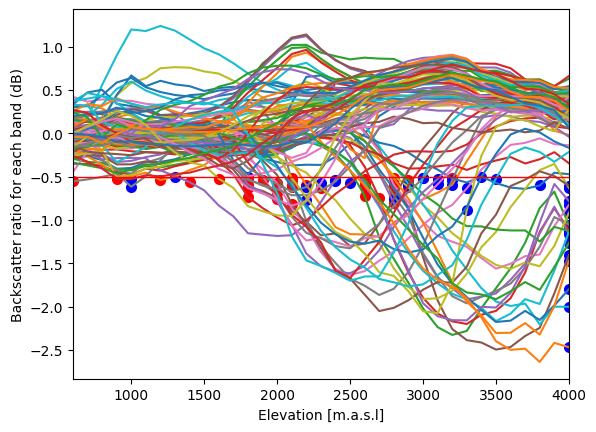

In [11]:
#--- Block 5: Determine the upper and lower elevation of wet snow.
# Define threshold which separates wet snow from dry or no snow
bscatdiff_wetsnow_threshold = -0.5

# Initialize arrays to store lower and upper elevation bands
wetsnow_lowerl = np.zeros(numfiles) # elevation which corresponds to the transition from no snow to wet snow. The snow line. (if our assumption: "wet snow has low radarbackscatter" is correct.)
wetsnow_upperl = np.zeros(numfiles) # elevation which corresponds to the transition from wet snow to dry snow. (Cold mountain peaks.)

# Find the lower and upper elevation bands
for i in range(numfiles):
    # If for each date values below the wet snow threshold exist...
    if np.min(median_bscatdiff_elev_matrix[i, :]) <= bscatdiff_wetsnow_threshold:
        # Then extract the lowest and highest elevation band
        columns = np.where(median_bscatdiff_elev_matrix[i, :] <= bscatdiff_wetsnow_threshold)[0]
        wetsnow_lowerl[i] = columns[0]
        wetsnow_upperl[i] = columns[-1]
    else:
        wetsnow_lowerl[i] = np.nan
        wetsnow_upperl[i] = np.nan

# Visualize backscatter ratio as a function of elevation bands
plt.figure()
plt.plot(elevations, np.transpose(median_bscatdiff_elev_matrix))
plt.plot(elevations, bscatdiff_wetsnow_threshold * np.ones(n_elev), 'r', linewidth=1)

for i in range(numfiles):
    if not np.isnan(wetsnow_lowerl[i]):
        plt.scatter(elevations[int(wetsnow_lowerl[i])], median_bscatdiff_elev_matrix[i, int(wetsnow_lowerl[i])], c='r', marker='o', linewidths=2)
    if not np.isnan(wetsnow_upperl[i]):
        plt.scatter(elevations[int(wetsnow_upperl[i])], median_bscatdiff_elev_matrix[i, int(wetsnow_upperl[i])], c='b', marker='o', linewidths=2)

plt.xlabel('Elevation [m.a.s.l]')
plt.ylabel('Backscatter ratio for each band (dB)')
plt.xlim([elevations[0], elevations[-1]])
plt.box(True)
plt.show()

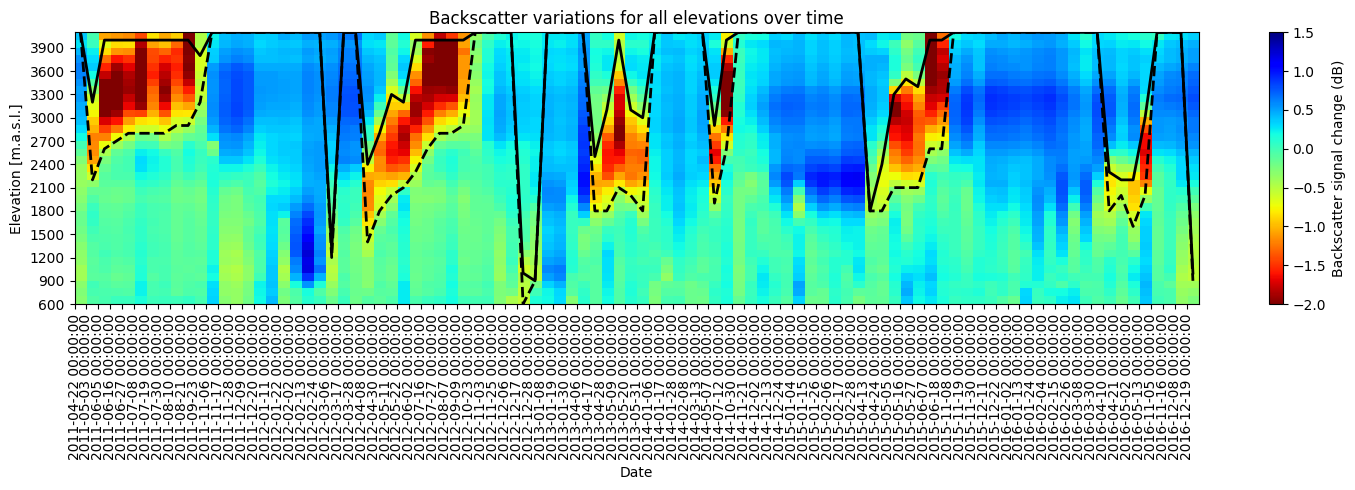

In [12]:
#--- Block 6: Visualization of the results------
# Define acquisition number as an array
acquisition_number = np.arange(0, len(files_bscat))

# Create a colormap for the plot
cmap = plt.cm.jet_r
cmap.set_bad(color='white')  # Set NaN values to white

# Visualize the backscatter variations for all elevations over time
# Use a symmetric color table, e.g., red ... white ... blue, to visualize
# the difference to the reference image.
# With red...white...blue, one can recognize: red = wet snow, blue = dry snow, white = no difference to reference image.

# Define wetsnow_lowerl and wetsnow_upperl (replace NaN values with 35)
we_l = np.copy(wetsnow_lowerl)
we_u = np.copy(wetsnow_upperl)
we_l[np.isnan(we_l)] = 35
we_u[np.isnan(we_u)] = 35

plt.figure(figsize=(15, 5))
plt.title('Backscatter variations for all elevations over time')
plt.imshow(np.rot90(median_bscatdiff_elev_matrix), extent=[0, len(files_bscat), 0, len(elevations)], cmap=cmap, aspect='auto', vmin=-2, vmax=1.5)
plt.xlabel('Date')
plt.ylabel('Elevation [m.a.s.l.]')
plt.xlim(0,len(files_bscat))
plt.ylim(0,len(elevations))
c = plt.colorbar()
c.set_label('Backscatter signal change (dB)')

# Plot wetsnow_lowerl and wetsnow_upperl
plt.plot(acquisition_number+0.5, we_l, '--k', linewidth=2) # plot the line in the middle of cell
plt.plot(acquisition_number+0.5, we_u, 'k', linewidth=2)

# Set ticks and labels for the x and y axes
plt.xticks(np.arange(0, len(files_bscat)), dates, rotation=90)
plt.yticks(np.arange(0, len(elevations), 3), elevations[::3])

plt.tight_layout()
plt.show()

In [13]:
#--- Block 7: Determine total area in km^2 with snowmelt (important e.g. for flood prediction
# Define area image pixel
area_per_pixel = 1658.4 / np.prod(dem.shape)  # 1658.4 km^2 is the total area of the images

# Create a histogram of the elevation distribution
elevation_histogram = np.zeros(len(elevations))
area_per_elevation = np.zeros(len(elevations))

# Count how many pixels of the DEM fall into a certain elevation band
# and convert the histogram into area (km^2) per elevation band
for i in range(len(elevations)):
    tmp = np.shape(ele_class_II[i])[1]
    elevation_histogram[i] = tmp
    area_per_elevation[i] = elevation_histogram[i] * area_per_pixel

# Initialize wet snow cover area array
wet_snow_cover_area = np.zeros(len(files_bscat))

for i in range(len(files_bscat)):
    if not np.isnan(wetsnow_upperl[i]):
        lower_idx = int(wetsnow_lowerl[i])
        upper_idx = int(wetsnow_upperl[i])
        wet_snow_cover_area[i] = np.sum(area_per_elevation[lower_idx:upper_idx+1])

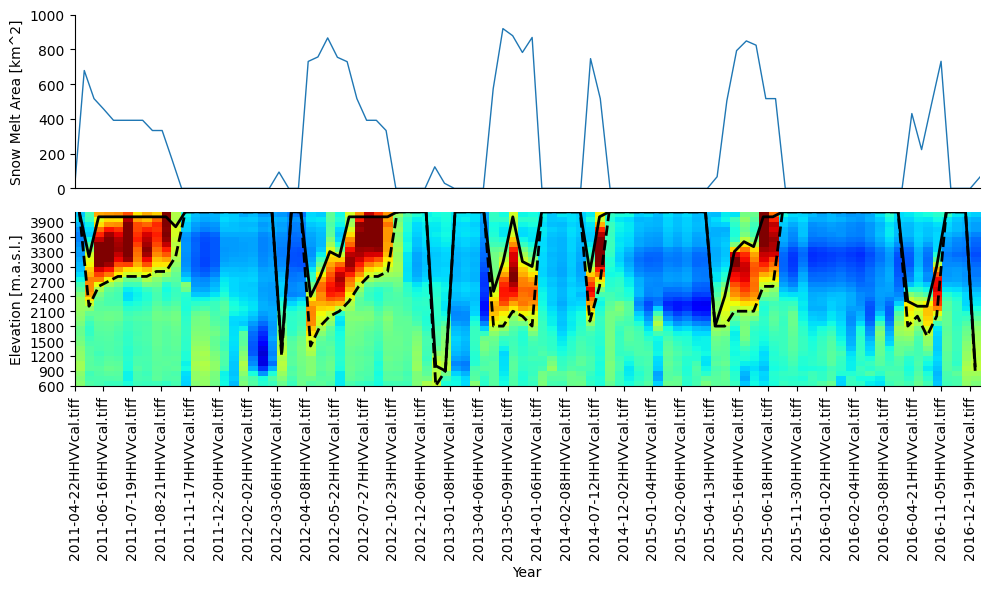

In [14]:
#---Block 8: Snowmelt area and backscatter variations for all elevations over time in one plot---
# Define the data for snowmelt area and backscatter variations
# Define the data for snowmelt area and backscatter variations
snow_melt_area = wet_snow_cover_area
backscatter_variations = np.rot90(median_bscatdiff_elev_matrix, k=1)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Plot snowmelt area over time
ax1.plot(acquisition_number, snow_melt_area, linewidth=1)
ax1.set_ylabel('Snow Melt Area [km^2]')
ax1.set_xlim(acquisition_number[0], acquisition_number[-1])
ax1.set_ylim(0, 1000)
ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Plot backscatter variations for all elevations over time
cmap = plt.cm.jet_r
cmap.set_bad(color='white')  # Set NaN values to white
cax = ax2.imshow(backscatter_variations, extent=[0, len(files_bscat), 0, len(elevations)], cmap=cmap, aspect='auto', vmin=-2, vmax=1.5)
ax2.plot(acquisition_number+0.5, we_l, '--k', linewidth=2) # plot the line in the middle of cell
ax2.plot(acquisition_number+0.5, we_u, 'k', linewidth=2)
ax2.set_ylabel('Elevation [m.a.s.l.]')
ax2.set_xlabel('Year')
ax2.set_xticks(np.arange(0, len(files_bscat), 3))
# Use the actual date labels for the x-axis
ax2.set_xticklabels([files_bscat[i].split('_')[1] for i in range(0, len(files_bscat), 3)], rotation=90)
ax2.set_yticks(np.arange(0, len(elevations), 3))
ax2.set_yticklabels(elevations[::3])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

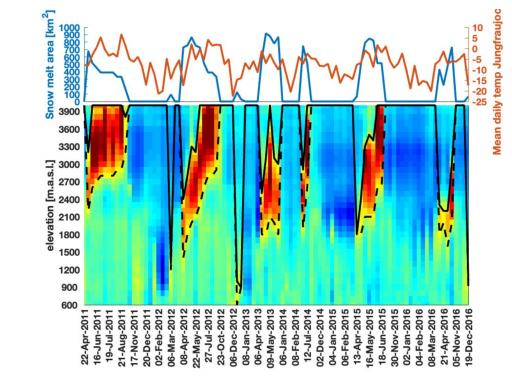

In [15]:
#----Block 9: plot for with temperature---------
#Finally we compare the wet snow mapping results with in-situ temperature data. This is similar to the plot above, but the mean daily temperature from Jungfraujoch are also plotted.

# Load the JPEG image
from PIL import Image
image_path = './exercise_data/snowVStemp.jpg'  # Replace 'your_image.jpg' with the path to your image
image = Image.open(image_path)

# Plot the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axis labels and ticks
plt.show()

In [19]:
#----Block 9: plot for with temperature
#This is similar to the plot above, but the mean daily temperature from
#Jungfraujoch are also plotted.
import pandas as pd
def read_temp(meteodatafile):
    with open(meteodatafile, 'r') as file:
        lines = file.readlines()

    # Initialize empty lists to store date and temperature data
    dates = []
    temperatures = []

    # Process each line of the file
    for line in lines:
        # Split the line into date and temperature using tab as the delimiter
        parts = line.strip().split('\t')  # Assuming tab separation, adjust if needed
        if len(parts) == 2:
            date_str, temp_str = parts
            dates.append(date_str)
            temperatures.append(float(temp_str))  # Convert temperature to float
            
    # Define input and output date formats
    input_format = "%d.%m.%Y"
    output_format = "%Y-%m-%d"
    formatted_dates = []

    # Loop through each date string and convert it to the desired format
    for date_str in dates:
        date_obj = datetime.strptime(date_str, input_format)
        formatted_date_str = date_obj.strftime(output_format)
        formatted_dates.append(formatted_date_str)

    return formatted_dates, temperatures

meteodatafile = './exercise_data/meteoJungfraujoch.txt'
[meteodates, temperatures] = read_temp(meteodatafile)

# Convert datetime objects to strings in 'YYYY-MM-DD' format
sardates = [dt.strftime('%Y-%m-%d') for dt in dates]

# Initialize empty lists to store date and temperature values
meteo_period_date = []
meteo_period_temp = []

# Loop through the 'meteodate' array
for i in range(len(meteodates)):
    if meteodates[i][0] in sardates:
        meteo_period_date.append(pd.to_datetime(meteodates[i][0]))
        meteo_period_temp.append(meteo.data[i][0])

# Create a DataFrame using the collected date and temperature values
meteo_period_df = pd.DataFrame({'date': meteo_period_date, 'temp': meteo_period_temp})

# Remove rows where date is zero
meteo_period_df = meteo_period_df[meteo_period_df['date'] != 0]

# Calculate mean temperature using groupby and mean functions
mean_temp = meteo_period_df.groupby('date')['temp'].mean()

